# Palmer Penguins Clustering

## Dataset treatment

In [1]:
%load_ext autoreload
%autoreload 2

import json
import time
import pandas as pd
from palmerpenguins import load_penguins
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import euclidean_distances

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Victor\Development\MESIO\ods\clustering\.venv\Lib\site-packages\palmerpenguins\penguins.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
df = load_penguins()
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [3]:
df = df.dropna().reset_index(drop=True)
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [4]:
df = pd.get_dummies(df, columns=["island", "sex", "year"], drop_first=True)
# df = pd.get_dummies(df, columns=["species"])
df["species"] = df["species"].astype("category")
df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_male,year_2008,year_2009
0,Adelie,39.1,18.7,181.0,3750.0,False,True,True,False,False
1,Adelie,39.5,17.4,186.0,3800.0,False,True,False,False,False
2,Adelie,40.3,18.0,195.0,3250.0,False,True,False,False,False
3,Adelie,36.7,19.3,193.0,3450.0,False,True,False,False,False
4,Adelie,39.3,20.6,190.0,3650.0,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...
328,Chinstrap,55.8,19.8,207.0,4000.0,True,False,True,False,True
329,Chinstrap,43.5,18.1,202.0,3400.0,True,False,False,False,True
330,Chinstrap,49.6,18.2,193.0,3775.0,True,False,True,False,True
331,Chinstrap,50.8,19.0,210.0,4100.0,True,False,True,False,True


In [5]:
X = df.drop("species", axis=1)
y = df["species"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df_standardized = pd.DataFrame(X_scaled, columns=X.columns)

df_standardized

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_male,year_2008,year_2009
0,-0.896042,0.780732,-1.426752,-0.568475,-0.765320,2.466801,0.991031,-0.716684,-0.735980
1,-0.822788,0.119584,-1.069474,-0.506286,-0.765320,2.466801,-1.009050,-0.716684,-0.735980
2,-0.676280,0.424729,-0.426373,-1.190361,-0.765320,2.466801,-1.009050,-0.716684,-0.735980
3,-1.335566,1.085877,-0.569284,-0.941606,-0.765320,2.466801,-1.009050,-0.716684,-0.735980
4,-0.859415,1.747026,-0.783651,-0.692852,-0.765320,2.466801,0.991031,-0.716684,-0.735980
...,...,...,...,...,...,...,...,...,...
328,2.162314,1.340165,0.431094,-0.257532,1.306643,-0.405383,0.991031,-0.716684,1.358732
329,-0.090248,0.475587,0.073816,-1.003795,1.306643,-0.405383,-1.009050,-0.716684,1.358732
330,1.026876,0.526444,-0.569284,-0.537380,1.306643,-0.405383,0.991031,-0.716684,1.358732
331,1.246638,0.933305,0.645461,-0.133155,1.306643,-0.405383,0.991031,-0.716684,1.358732


### Correlation

<Axes: >

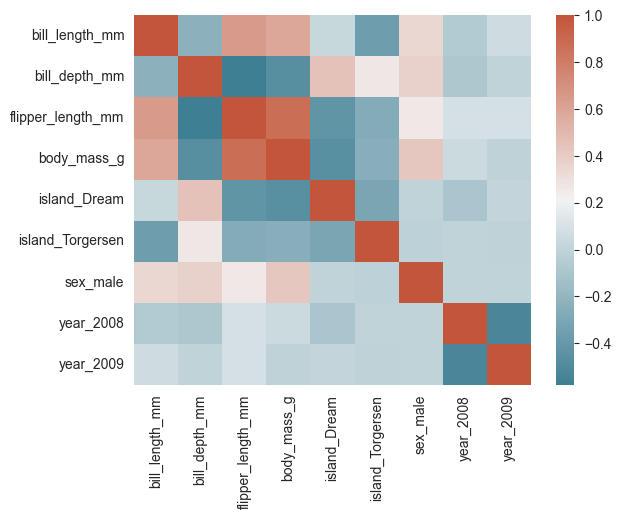

In [6]:
sns.heatmap(df_standardized.corr(), cmap=sns.diverging_palette(220, 20, as_cmap=True))

### Feature importance

In [7]:
f_values, p_values = f_classif(df_standardized, y)

anova_results = pd.DataFrame({"Feature": X.columns, "F-Value": f_values, "P-Value": p_values}).sort_values(
    by="F-Value", ascending=False
)

print(anova_results)

             Feature     F-Value        P-Value
2  flipper_length_mm  567.406992  1.587418e-107
0     bill_length_mm  397.299437   1.380984e-88
1      bill_depth_mm  344.825082   1.446616e-81
3        body_mass_g  341.894895   3.744505e-81
4       island_Dream  208.347193   3.063542e-59
5   island_Torgersen   43.988989   1.160083e-17
7          year_2008    1.245831   2.890514e-01
6           sex_male    0.024088   9.762014e-01
8          year_2009    0.019740   9.804544e-01


### Distance scaling according to feature importance

In [8]:
df_scaled = df_standardized.copy()
df_scaled["flipper_length_mm"] = df_scaled["flipper_length_mm"] * 3
df_scaled["bill_length_mm"] = df_scaled["bill_length_mm"] * 2
df_scaled["bill_depth_mm"] = df_scaled["bill_depth_mm"] * 1.75
df_scaled["body_mass_g"] = df_scaled["body_mass_g"] * 1.75

## Clustering

In [9]:
from kmeans import apply_kmeans
from kmedoid import apply_kmedoids
from mst import run_mst_clustering
from ampl.ampl import compute_distance_matrix, write_ampl_dat, run_ampl_and_get_assignments
from utils import penguin_generator, show_confusion_matrix, scatter_comparison, align_with_species
from sklearn.metrics import confusion_matrix

### KMeans

In [ ]:
df["Cluster KMeans"] = apply_kmeans(df_standardized[anova_results["Feature"][:6]], 3)
df["Cluster KMeans Scaled"] = apply_kmeans(df_scaled[anova_results["Feature"][:6]], 3)
df["Cluster KMeans BiVariate"] = apply_kmeans(df_standardized[anova_results["Feature"][:2]], 3)
align_with_species(df, ["Cluster KMeans", "Cluster KMeans Scaled", "Cluster KMeans BiVariate"])

In [ ]:
fig = scatter_comparison(
    df, "species", "Cluster KMeans", "Cluster KMeans Scaled", "Cluster KMeans BiVariate", "K-Means"
)
plt.tight_layout()
fig.savefig("images/kmeans_clustering.png", dpi=600)

#### Evaluation

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))
show_confusion_matrix(
    confusion_matrix(df["species"].cat.codes, df["Cluster KMeans"]),
    "Aligned Confusion Matrix (MultiVariate)",
    ax=ax[0],
)
show_confusion_matrix(
    confusion_matrix(df["species"].cat.codes, df["Cluster KMeans Scaled"]),
    "Aligned Confusion Matrix (MultiVariate Scaled)",
    ax=ax[1],
)
show_confusion_matrix(
    confusion_matrix(df["species"].cat.codes, df["Cluster KMeans BiVariate"]),
    "Aligned Confusion Matrix (BiVariate)",
    ax=ax[2],
)
plt.tight_layout()
fig.savefig("images/kmeans_confusion.png", dpi=600)

### KMedoids

In [ ]:
df["Cluster KMedoids"] = apply_kmedoids(df_standardized[anova_results["Feature"][:6]], 3)
df["Cluster KMedoids Scaled"] = apply_kmedoids(df_scaled[anova_results["Feature"][:6]], 3)
df["Cluster KMedoids BiVariate"] = apply_kmedoids(df_standardized[anova_results["Feature"][:2]], 3)
align_with_species(df, ["Cluster KMedoids", "Cluster KMedoids Scaled", "Cluster KMedoids BiVariate"])

In [ ]:
fig = scatter_comparison(df, "species", "Cluster KMedoids", "Cluster KMedoids Scaled", "Cluster KMedoids BiVariate", "K-Medoids")
plt.tight_layout()
fig.savefig("images/kmedoids_clustering.png", dpi=600)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))
show_confusion_matrix(
    confusion_matrix(df["species"].cat.codes, df["Cluster KMedoids"]),
    "Aligned Confusion Matrix (MultiVariate)",
    ax=ax[0],
)
show_confusion_matrix(
    confusion_matrix(df["species"].cat.codes, df["Cluster KMedoids Scaled"]),
    "Aligned Confusion Matrix (MultiVariate Scaled)",
    ax=ax[1],
)
show_confusion_matrix(
    confusion_matrix(df["species"].cat.codes, df["Cluster KMedoids BiVariate"]),
    "Aligned Confusion Matrix (BiVariate)",
    ax=ax[2],
)
plt.tight_layout()
fig.savefig("images/kmedoids_confusion.png", dpi=600)

### MST

In [ ]:
df["Cluster MST"] = run_mst_clustering(df_standardized[anova_results["Feature"][:6]], cutoff=2)
df["Cluster MST Scaled"] = run_mst_clustering(df_scaled[anova_results["Feature"][:6]], cutoff=2)
df["Cluster MST BiVariate"] = run_mst_clustering(df_standardized[anova_results["Feature"][:2]], cutoff=2)
align_with_species(df, ["Cluster MST", "Cluster MST Scaled", "Cluster MST BiVariate"])

In [ ]:
fig = scatter_comparison(df, "species", "Cluster MST", "Cluster MST Scaled", "Cluster MST BiVariate", "Cluster")
plt.tight_layout()
fig.savefig("images/mst_clustering.png", dpi=600)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))
show_confusion_matrix(
    confusion_matrix(df["species"].cat.codes, df["Cluster MST"]),
    "Aligned Confusion Matrix (MultiVariate)",
    ax=ax[0],
)
show_confusion_matrix(
    confusion_matrix(df["species"].cat.codes, df["Cluster MST Scaled"]),
    "Aligned Confusion Matrix (MultiVariate Scaled)",
    ax=ax[1],
)
show_confusion_matrix(
    confusion_matrix(df["species"].cat.codes, df["Cluster MST BiVariate"]),
    "Aligned Confusion Matrix (BiVariate)",
    ax=ax[2],
)
plt.tight_layout()
fig.savefig("images/mst_confusion.png", dpi=600)

### KMedoids AMPL

In [ ]:
np_full = compute_distance_matrix(df_standardized[anova_results["Feature"][:6]])
np_scaled = compute_distance_matrix(df_scaled[anova_results["Feature"][:6]])
np_bivariate = compute_distance_matrix(df_standardized[anova_results["Feature"][:2]])

In [ ]:
np_full = euclidean_distances(df_standardized[anova_results["Feature"][:6]])
np_scaled = euclidean_distances(df_scaled[anova_results["Feature"][:6]])
np_bivariate = euclidean_distances(df_standardized[anova_results["Feature"][:2]])

In [ ]:
write_ampl_dat(np_full, 3)
df_full = run_ampl_and_get_assignments()
print("Full Done")
write_ampl_dat(np_scaled, 3)
df_scaled = run_ampl_and_get_assignments()
print("Scaled Done")
write_ampl_dat(np_bivariate, 3)
df_bivariate = run_ampl_and_get_assignments()
print("BiVariate Done")

In [ ]:
df["Cluster AMPL"], _ = pd.factorize(df_full["AMPL"])
df["Cluster AMPL Scaled"], _ = pd.factorize(df_scaled["AMPL"])
df["Cluster AMPL BiVariate"], _ = pd.factorize(df_bivariate["AMPL"])

align_with_species(df, ["Cluster AMPL", "Cluster AMPL Scaled", "Cluster AMPL BiVariate"])

In [ ]:
fig = scatter_comparison(df, "species", "Cluster AMPL", "Cluster AMPL Scaled", "Cluster AMPL BiVariate", "Cluster")
plt.tight_layout()
fig.savefig("images/ampl_clustering.png", dpi=600)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))
show_confusion_matrix(
    confusion_matrix(df["species"].cat.codes, df["Cluster AMPL"]),
    "Aligned Confusion Matrix (MultiVariate)",
    ax=ax[0],
)
show_confusion_matrix(
    confusion_matrix(df["species"].cat.codes, df["Cluster AMPL Scaled"]),
    "Aligned Confusion Matrix (MultiVariate Scaled)",
    ax=ax[1],
)
show_confusion_matrix(
    confusion_matrix(df["species"].cat.codes, df["Cluster AMPL BiVariate"]),
    "Aligned Confusion Matrix (BiVariate)",
    ax=ax[2],
)
plt.tight_layout()
fig.savefig("images/ampl_confusion.png", dpi=600)

#### Time analysis

In [ ]:
penguin_generator(df, 1000)

In [10]:
sizes = [90, 180, 300, 600, 900, 1200, 12_000, 120_000, 1_200_000]

In [ ]:
times = dict()
for size in sizes:
    fake_penguins = penguin_generator(original_penguins=df, penguins_per_species=size // 3)
    X = fake_penguins.drop("species", axis=1)
    y = fake_penguins["species"].copy()

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    fake_penguins = pd.DataFrame(X_scaled, columns=X.columns)
    fake_distances = euclidean_distances(fake_penguins[anova_results["Feature"][:6]])

    write_ampl_dat(fake_distances, 3)
    start = time.time()
    fake_clusters = run_ampl_and_get_assignments()
    end = time.time()

    times[size] = end - start

    with open("ampl_times.json", "w", encoding="utf8") as f:
        json.dump(times, f)


CPLEX 22.1.2: CPLEX 22.1.2: optimal solution; objective 134.3371
1838 simplex iterations
CPLEX 22.1.2: CPLEX 22.1.2: optimal solution; objective 250.4315
6503 simplex iterations
CPLEX 22.1.2: optimal solution; objective 429.71
15 simplex iterations


## Comparison